# Analyse décès sur le territoire Français

Une analyse des impacts globaux du covid en s'abstrayant des biais de tests

In [4]:
# Generic imports
import pandas as pd
import matplotlib.pyplot as plt

## data crunching

In [5]:
# Data from insee
# https://insee.fr/fr/information/4470857
insee_file = "2020-05-07_deces_quotidiens_departement_csv.csv"
df_insee = pd.read_csv("./Data_FR_Deaths/" + insee_file, delimiter=";", index_col="Date_evenement")
df_insee

,Zone,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,,
01/03/2020,France,1624.0,1774.0,1708,1872,1928,2136
02/03/2020,France,3262.0,3552.0,3467,3782,3933,4327
03/03/2020,France,4889.0,5311.0,5035,5530,5881,6455
04/03/2020,France,6565.0,7112.0,6747,7410,7768,8545
05/03/2020,France,8189.0,8879.0,8455,9278,9770,10746
...,...,...,...,...,...,...,...
27/05/2020,Dept_976,NaN,NaN,203,203,160,160
28/05/2020,Dept_976,NaN,NaN,207,207,164,164
29/05/2020,Dept_976,NaN,NaN,208,208,166,166


### Vérification de l'intégrité des sommes

In [6]:
check = df_insee[df_insee.loc[:,"Zone"]=="France"]

In [7]:
check_2 = df_insee[df_insee.loc[:,"Zone"]!="France"].groupby('Date_evenement').sum()

In [8]:
check_2

,Communes_a_envoi_dematerialise_Deces2020,Total_deces_2020,Communes_a_envoi_dematerialise_Deces2019,Total_deces_2019,Communes_a_envoi_dematerialise_Deces2018,Total_deces_2018
Date_evenement,,,,,,
01/03/2020,1624.0,1774.0,1708,1872,1928,2136
01/04/2020,60319.0,65352.0,50490,55320,56559,62189
01/05/2020,118217.0,0.0,95440,104444,102240,112325
02/03/2020,3262.0,3552.0,3467,3782,3933,4327
02/04/2020,62732.0,67965.0,52047,57021,58114,63904
...,...,...,...,...,...,...
30/03/2020,55238.0,59840.0,47485,52013,53365,58641
30/04/2020,117094.0,0.0,93924,102785,100887,110841
30/05/2020,0.0,0.0,137461,150328,143279,157215


In [9]:
check_3 = check.join(check_2, rsuffix="_sum",)[["Total_deces_2020","Total_deces_2019","Total_deces_2018", "Total_deces_2020_sum","Total_deces_2019_sum","Total_deces_2018_sum"]]

In [10]:
(check_3["Total_deces_2020"]-check_3["Total_deces_2020_sum"]).describe()

count    58.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [11]:
(check_3["Total_deces_2019"]-check_3["Total_deces_2019_sum"]).describe()

count    92.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

In [12]:
(check_3["Total_deces_2018"]-check_3["Total_deces_2018_sum"]).describe()

count    92.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0
dtype: float64

### filtrage et reformation du df insee

In [13]:
df_insee = df_insee[df_insee["Zone"]=="France"][["Total_deces_2020"]]

In [14]:
df_insee.columns=[2020]
df_insee.sort_index(axis=1,inplace=True)

In [15]:
# our main dataframe to compile all data 2020 and before 
df_wp = df_insee.diff()
df_wp.index = pd.to_datetime(df_wp.index, dayfirst=True)

In [16]:
df_wp.loc["2020/03/01",:]=df_insee.loc["01/03/2020",:]

In [17]:
df_wp

,2020
Date_evenement,
2020-03-01,1774.0
2020-03-02,1778.0
2020-03-03,1759.0
2020-03-04,1801.0
2020-03-05,1767.0
...,...
2020-05-27,NaN
2020-05-28,NaN
2020-05-29,NaN


## Données de références

In [18]:
# données historiques
df_histo_csv = pd.read_csv("./Data_FR_Deaths/" + 'histo_deces.csv', index_col = 0)
# remove badly formatted data and before 2000
df_histo_csv = df_histo_csv.filter(regex = '2[0-9]{3}\-[0-1][0-9]\-[0-3][0-9]', axis=0)
# transform index into dates
#df_histo_csv.index = pd.to_datetime(df_histo_csv.index, format = "%Y-%m-%d")
df_histo_csv.index = pd.DatetimeIndex(df_histo_csv.index)
# Add info for reference
df_histo_csv.reset_index(inplace=True)
#df_histo_csv['date_deces'].apply(np.year)
#df_histo_csv['year'] = pd.DatetimeIndex(df_histo_csv['date_deces']).year
#df_histo_csv['week'] = pd.DatetimeIndex(df_histo_csv['date_deces']).weekofyear
#df_histo_csv['dow'] = pd.DatetimeIndex(df_histo_csv['date_deces']).weekday  + 1

#df_histo_csv['ref'] =  df_histo_csv['week'].astype('str') + "-" + df_histo_csv['dow'].astype('str')


In [19]:
df_histo_csv

,date_deces,nbr_deces
0,2000-01-01,1974
1,2000-01-02,2040
2,2000-01-03,2086
3,2000-01-04,2080
4,2000-01-05,2039
...,...,...
7390,2020-03-26,1647
7391,2020-03-27,1178
7392,2020-03-28,853
7393,2020-03-29,559


### Date for 2020 and references

In [20]:
import datetime
base = datetime.datetime.fromisoformat("2020-01-01")
date_list = [base + datetime.timedelta(days=x) for x in range(366)]

In [21]:
df_histo = pd.DataFrame(date_list)
df_histo.columns = ['date_ref']
df_histo['year'] = pd.DatetimeIndex(df_histo['date_ref']).year
df_histo['week'] = pd.DatetimeIndex(df_histo['date_ref']).weekofyear
df_histo['dow'] = pd.DatetimeIndex(df_histo['date_ref']).weekday  + 1
#df_histo['ref'] = df_histo['week'].astype('str') + "-" + df_histo['dow'].astype('str')
df_histo['ref'] = df_histo['date_ref'] 

In [22]:
lst_years = range(2019,1999,-1)

In [23]:
# Join the references same dow last year (-364d)
for x in lst_years:
    df_histo['ref'] = df_histo['ref'] - pd.Timedelta(days=364)
    df_histo = df_histo.join(df_histo_csv.set_index('date_deces'), on=['ref'],rsuffix='_'+str(x), how='left')


In [24]:
df_histo.drop(['year','week','dow','ref'], axis=1, inplace=True)
df_histo.set_index('date_ref',inplace=True)
df_histo.columns=lst_years

In [25]:
df_histo

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,2000
date_ref,,,,,,,,,,,,,,,,,,,,
2020-01-01,1935,2137,2251,1799,1969,1686,1742,1686,1785,1796,1972,1713,1665,1665,1604,1702,1706,1830,1728,1886
2020-01-02,1880,2160,2271,1731,1920,1750,1868,1716,1691,1790,2003,1689,1539,1631,1625,1597,1677,1816,1585,1969
2020-01-03,1900,2102,2260,1721,1965,1699,1777,1692,1714,1728,2017,1688,1579,1602,1573,1561,1556,1856,1633,1979
2020-01-04,1921,2020,2239,1741,1936,1693,1793,1648,1725,1694,1942,1668,1600,1548,1668,1633,1632,1851,1625,1975
2020-01-05,1896,2008,2228,1745,1903,1562,1675,1642,1633,1577,2005,1706,1446,1599,1533,1541,1572,1788,1633,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1715,1756,1973,2206,1726,1856,1618,1706,1713,1673,1732,1915,1682,1532,1594,1458,1448,1772,1872,1540
2020-12-28,1892,1890,2027,2371,1835,1978,1786,1787,1736,1759,1788,2047,1722,1658,1577,1652,1614,1851,1916,1764
2020-12-29,1800,1839,2142,2353,1778,1848,1781,1803,1776,1803,1820,2086,1803,1557,1734,1619,1675,1774,1852,1646


In [26]:
#dummy historical data
#import numpy as np

#df_histo = pd.DataFrame(np.random.randint(1500,2000,size=(365, 19)),columns=range(1998,2017))

In [27]:
df_histo['max'] = df_histo.max(axis=1)
df_histo['min'] = df_histo.min(axis=1)

In [28]:
df_histo

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,2007,2006,2005,2004,2003,2002,2001,2000,max,min
date_ref,,,,,,,,,,,,,,,,,,,,,
2020-01-01,1935,2137,2251,1799,1969,1686,1742,1686,1785,1796,...,1665,1665,1604,1702,1706,1830,1728,1886,2251,1604
2020-01-02,1880,2160,2271,1731,1920,1750,1868,1716,1691,1790,...,1539,1631,1625,1597,1677,1816,1585,1969,2271,1539
2020-01-03,1900,2102,2260,1721,1965,1699,1777,1692,1714,1728,...,1579,1602,1573,1561,1556,1856,1633,1979,2260,1556
2020-01-04,1921,2020,2239,1741,1936,1693,1793,1648,1725,1694,...,1600,1548,1668,1633,1632,1851,1625,1975,2239,1548
2020-01-05,1896,2008,2228,1745,1903,1562,1675,1642,1633,1577,...,1446,1599,1533,1541,1572,1788,1633,1995,2228,1446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,1715,1756,1973,2206,1726,1856,1618,1706,1713,1673,...,1682,1532,1594,1458,1448,1772,1872,1540,2206,1448
2020-12-28,1892,1890,2027,2371,1835,1978,1786,1787,1736,1759,...,1722,1658,1577,1652,1614,1851,1916,1764,2371,1577
2020-12-29,1800,1839,2142,2353,1778,1848,1781,1803,1776,1803,...,1803,1557,1734,1619,1675,1774,1852,1646,2353,1557


### Complement données début 2020 
Jan-Feb depuis historique

In [29]:
deb_2020 = pd.date_range("2020-01-01", "2020-02-29")

df_deb_2020 = df_histo_csv.set_index('date_deces').loc[deb_2020, :]
df_deb_2020.columns = [2020]
df_deb_2020.describe()

,2020
count,60.000000
mean,1811.566667
std,83.341317
min,1637.000000
25%,1754.000000
50%,1802.500000
75%,1866.500000
max,1996.000000


In [30]:
df_wp.describe
df_wp = df_wp.append(df_deb_2020)


In [31]:
df_wp= df_wp.sort_index()


## Comparaison décès par jour 2020 vs références

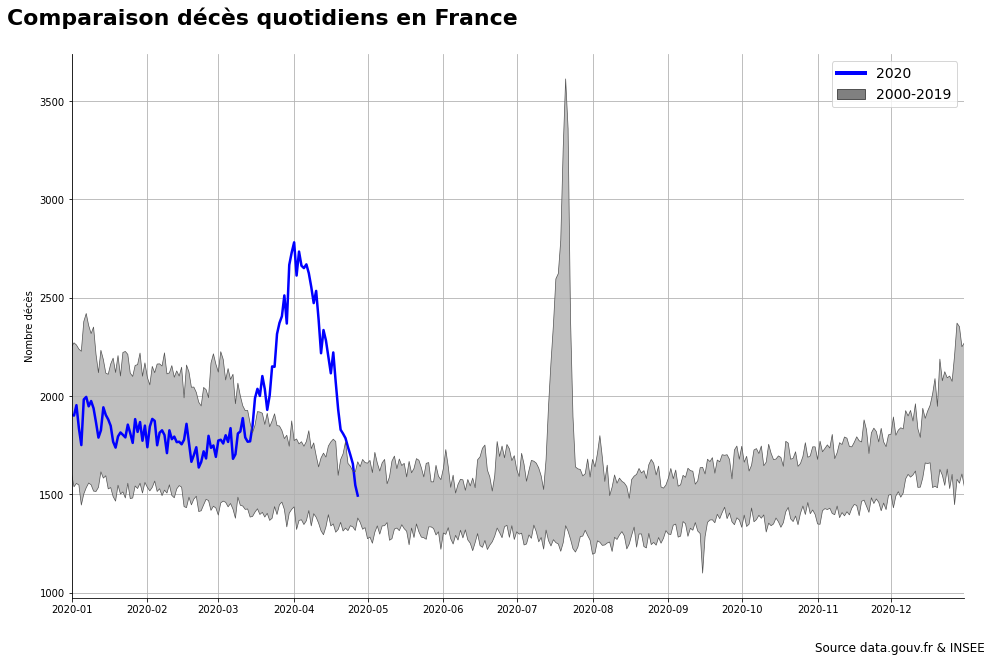

In [32]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Figure et axe principaux
# ########################
fig, ax = plt.subplots(figsize=(16,10))

# courbe 2020

ax.plot(df_wp, label='2020', linewidth=2.5, color='blue')


# defining area of reference
# ##########################

# Boundaries
ax.plot(df_histo[['min','max']], label='2000-2019', color="#525252",linewidth=0.7 )
# fill
ax.fill_between(date_list, df_histo['min'], df_histo['max'], facecolor='grey', alpha=0.5)


# layout
ax.set_title("Comparaison décès quotidiens en France", fontsize=22, pad=30, fontweight = 'bold',horizontalalignment='right')
#ax.set_xlabel("date du jour")
ax.set_ylabel("Nombre décès")
ax.grid(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.margins(0.05)
ax.set_xlim([pd.to_datetime('2020-01-01'),pd.to_datetime('2020-12-31')])

# define legend
# #############
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='2020'),
                   Patch(facecolor='grey', edgecolor='#525252',
                         label='2000-2019')]
ax.legend(handles=legend_elements, fontsize=14)

fig.text(0.77, 0.05, "Source data.gouv.fr & INSEE", fontsize=12)


fig.savefig("deces_fr.png")
